## About Company

Happy Customer Bank is a mid-sized private bank which deals in all kinds of loans. They have presence across all major cities in India and focus on lending products. They have a digital arm which sources customers from the internet.

## Problem

Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.

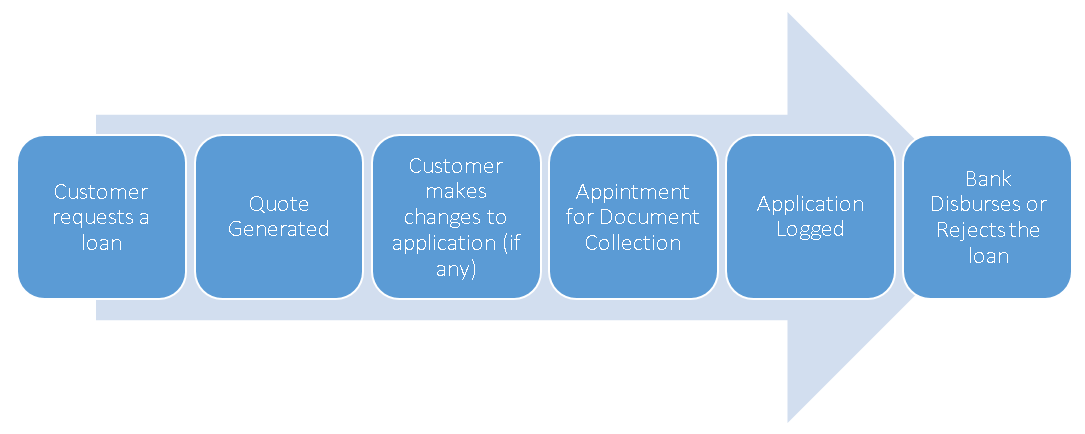

In [1]:
from IPython.display import Image
Image(filename = "Images/Process_at_Happy_Customer_Bank.png",width=800, height=400)

In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.
Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

## Data Set
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.

Source of data:

https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

## Input variables:


    ID - Unique ID (can not be used for predictions)
    Gender- Sex
    City - Current City
    Monthly_Income - Monthly Income in rupees
    DOB - Date of Birth
    Lead_Creation_Date - Lead Created on date
    Loan_Amount_Applied - Loan Amount Requested (INR)
    Loan_Tenure_Applied - Loan Tenure Requested (in years)
    Existing_EMI - EMI of Existing Loans (INR)
    Employer_Name - Employer Name
    Salary_Account- Salary account with Bank
    Mobile_Verified - Mobile Verified (Y/N)
    Var5- Continuous classified variable
    Var1- Categorical variable with multiple levels
    Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
    Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
    Interest_Rate- Interest Rate of Submitted Loan Amount
    Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
    EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
    Filled_Form- Filled Application form post quote
    Device_Type- Device from which application was made (Browser/ Mobile)
    Var2- Categorical Variable with multiple Levels
    Source- Categorical Variable with multiple Levels
    Var4- Categorical Variable with multiple Levels
    
## Outcomes:

    LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
    Disbursed- Loan Disbursed (Target Variable)

# -------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
#Reading data. The file has been saved according to the ISO-8859-1 standard what it refers to as "Latin alphabet no. 1"
data = pd.read_csv('Data/HappyCustomerBank/Train_nyOWmfK.csv',encoding='latin_1')
print(data.shape)

(87020, 26)


In [4]:
data.head(40)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0
5,ID000010K00,Male,Bengaluru,45000,21-Apr-82,20-May-15,300000.0,5.0,15000.0,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,...,13.99,1500.0,6978.92,N,Web-browser,B,S143,3,1,0
6,ID000011L10,Female,Sindhudurg,70000,23-Oct-87,01-May-15,6.0,5.0,0.0,CARNIVAL CRUISE LINE,...,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,0
7,ID000012M20,Male,Bengaluru,20000,25-Jul-75,20-May-15,200000.0,5.0,2597.0,GOLDEN TULIP FLORITECH PVT. LTD,...,NaN,NaN,NaN,N,Web-browser,B,S159,3,0,0
8,ID000013N30,Male,Kochi,75000,26-Jan-72,02-May-15,0.0,0.0,0.0,SIIS PVT LTD,...,14.85,26000.0,30824.65,Y,Mobile,C,S122,5,0,0
9,ID000014O40,Female,Mumbai,30000,12-Sep-89,03-May-15,300000.0,3.0,0.0,SOUNDCLOUD.COM,...,18.25,1500.0,10883.38,N,Web-browser,B,S133,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

# Data preparation

In [6]:
del data['ID']

### Cities

Informations about cityies are important. The number of applications from a given city correlates with the actual city size. Without using an additional file with the number of poles in individual cities of India, we can easily use the number of applications that approximately shows the size of the city.
missing values can be supplemented with the category "Unknown".

In [7]:
data['City'].isna().sum()

1003

In [8]:
data['City'].fillna('Unknown', inplace=True)

In [9]:
data.City.value_counts().head()

Delhi        12527
Bengaluru    10824
Mumbai       10795
Hyderabad     7272
Chennai       6916
Name: City, dtype: int64

The initial assumption has not been confirmed. The dependence of the number of logins from cities does not perfectly reflect the city size. Examples are Surat (4.46 million), 10 Gurgaon (0.876 million), 9 Jaipur (3 million). The table will be created based on Wikipedia data, a list of cities in India along with the population. On this basis, the size of the cities will be compared and then grouped according to their actual size. 

https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population

In [10]:
data_City_population = pd.read_excel('Data/Cities_of_India_excel.xlsx')
print(data_City_population.shape)
data_City_population.head(10)

(318, 5)


,Rank,City,Population_2011,Population_2001,State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bengaluru,8436675,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat
5,6,Chennai,4681087,4343645,Tamil Nadu
6,7,Kolkata,4486679,4572876,West Bengal
7,8,Surat,4467797,2433835,Gujarat
8,9,Pune,3115431,2538473,Maharashtra
9,10,Jaipur,3046163,2322575,Rajasthan


In [11]:
data_City_population['Population_2011']

0      12442373
1      11007835
2       8436675
3       6809970
4       5570585
         ...   
313      102505
314      102456
315      101520
316      100286
317      100000
Name: Population_2011, Length: 318, dtype: int64

In [12]:
data_City_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      318 non-null    int64 
 1   City                      318 non-null    object
 2   Population_2011           318 non-null    int64 
 3   Population_2001           318 non-null    object
 4   State or union territory  318 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.5+ KB


In [13]:
metropoly = data_City_population.City.values[:5]
big_city = data_City_population.City.values[5:24]
medium_city = data_City_population.City.values[24:94]
small_city = data_City_population.City.values[94:319]

In [14]:
def city_sorting(city):
    if city in metropoly:
        return 'I'
    elif city in big_city:
        return 'II'
    elif city in medium_city:
        return 'III'
    elif city in small_city:
        return 'IV'
    else:
        return "V"
    
data["City_size"] = data.City.apply(city_sorting)

In [15]:
print(data.City[:11])
data.City_size[:11]

0          Delhi
1         Mumbai
2      Panchkula
3        Saharsa
4      Bengaluru
5      Bengaluru
6     Sindhudurg
7      Bengaluru
8          Kochi
9         Mumbai
10        Mumbai
Name: City, dtype: object


0       I
1       I
2      IV
3      IV
4       I
5       I
6       V
7       I
8     III
9       I
10      I
Name: City_size, dtype: object

<AxesSubplot:>

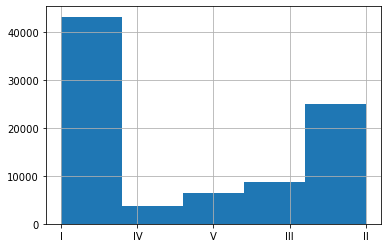

In [16]:
data['City_size'].hist(bins=5)

In [17]:
del data['City']

### Date of birth

Assuming that dataset was composed in 2015, we can estimate age of the client. The rest of information stored in this variable can be dropped.

A new Age variable will arise.

In [18]:
data['DOB'] = pd.to_datetime(data['DOB'], format='%d-%b-%y')
data['Lead_Creation_Date'] = pd.to_datetime(data['Lead_Creation_Date'], format='%d-%b-%y')
data['Age'] = data.Lead_Creation_Date.apply(lambda x: x.year) - data.DOB.apply(lambda x: x.year)

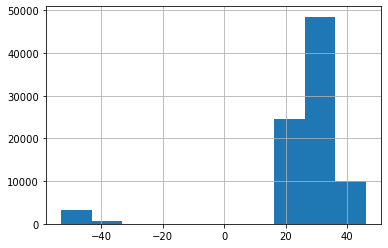

In [19]:
data.Age.hist()
plt.show()

In [20]:
data[data['Age'] < 0].head(3)

,Gender,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,City_size,Age
34,Male,56000,2064-05-28,2015-05-01,500000.0,5.0,14500.0,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,Y,...,NaN,N,Web-browser,E,S133,3,0,0,I,-49
58,Male,45000,2050-05-20,2015-05-01,0.0,0.0,0.0,XHZ,ICICI Bank,Y,...,NaN,N,Web-browser,B,S133,2,0,0,I,-35
89,Male,600000,2068-04-01,2015-05-01,1000000.0,5.0,15000.0,GOPALA KRISHNA,State Bank of India,Y,...,NaN,N,Web-browser,B,S133,3,0,0,III,-53


Inaccurate DOB have been inserted (last 2 digits) and date format has inserted the front 2 digits of the current year. That is why the negative figure for the age has come.

In [21]:
data['Age'] = data.Age.where(data.Age > 0, data.Age+100)

In [22]:
data = data.drop(['DOB','Lead_Creation_Date'], axis=1)

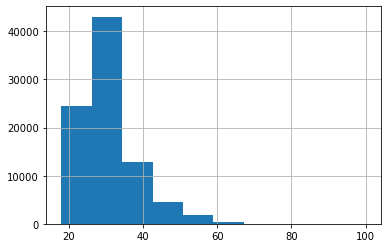

In [23]:
data.Age.hist()
plt.show()

### Monthly_Income

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  object 
 1   Monthly_Income         87020 non-null  int64  
 2   Loan_Amount_Applied    86949 non-null  float64
 3   Loan_Tenure_Applied    86949 non-null  float64
 4   Existing_EMI           86949 non-null  float64
 5   Employer_Name          86949 non-null  object 
 6   Salary_Account         75256 non-null  object 
 7   Mobile_Verified        87020 non-null  object 
 8   Var5                   87020 non-null  int64  
 9   Var1                   87020 non-null  object 
 10  Loan_Amount_Submitted  52407 non-null  float64
 11  Loan_Tenure_Submitted  52407 non-null  float64
 12  Interest_Rate          27726 non-null  float64
 13  Processing_Fee         27420 non-null  float64
 14  EMI_Loan_Submitted     27726 non-null  float64
 15  Fi

<AxesSubplot:>

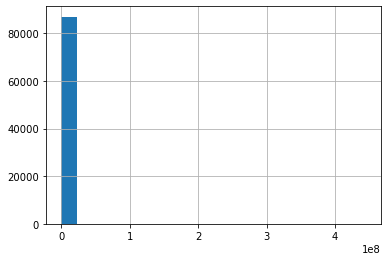

In [25]:
data['Monthly_Income'].hist(bins=20)

In [26]:
print(data['Monthly_Income'].value_counts()[15:25])  # piece of data income  with one amount abowe mean
print('---------------------')
print(data['Monthly_Income'].describe())
print('---------------------')
print("Monthly_Income median:  " + str(data['Monthly_Income'].median()))

45000     1034
14000     1017
13000      975
32000      971
28000      969
100000     968
60000      965
24000      904
27000      874
26000      809
Name: Monthly_Income, dtype: int64
---------------------
count    8.702000e+04
mean     5.884997e+04
std      2.177511e+06
min      0.000000e+00
25%      1.650000e+04
50%      2.500000e+04
75%      4.000000e+04
max      4.445544e+08
Name: Monthly_Income, dtype: float64
---------------------
Monthly_Income median:  25000.0


<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

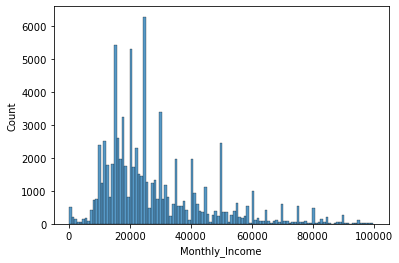

In [27]:
import seaborn as sns

sns.histplot(data[data['Monthly_Income'] < 10e4]['Monthly_Income'])

In [28]:
data['Monthly_Income'].isna().sum()

0

### Employer_Name

In [29]:
data.Employer_Name.value_counts()

0                                               4914
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
                                                ... 
CYBAGE                                             1
PREMIER TISSUES INDIA LTD                          1
DABUR RESEARCH FOUNDATION                          1
ASHOKLEYLAND                                       1
PRASADME                                           1
Name: Employer_Name, Length: 43567, dtype: int64

It can be assumed that "0" stands for unemployment or self-employment. In 2015, banks recognized the self-employed as an uncertain source of income. We will continue to look for specific rules on self-employment. 

In [30]:
df_self_employed  = data.Employer_Name[data.apply(lambda row: row.astype(str).str.contains('SELF').any(), axis=1)]
df_self_employed 

12993                                             SELF
20003                                             SELF
22664                                          ONESELF
38067                                             SELF
49194                SELF EMPLOYED WOMENS ASSO.,BHARAT
56245    SYND RURAL SELF EMPLOYMENT TRAINING INSTITUTE
58632                       SELF EMPLOYED ASSO.,BHARAT
59060                                             SELF
66081                       KOSHAL SELF-HELP COOP LTD.
72679                                             SELF
74588                                           MYSELF
Name: Employer_Name, dtype: object

KOSHAL SELF-HELP COOP LTD., 
SYND RURAL SELF EMPLOYMENT TRAINING INSTITUTE, 
SELF EMPLOYED WOMENS ASSO.,BHARAT, 
SELF EMPLOYED ASSO.,BHARAT 
are companies.

In [34]:
data.Employer_Name['SELF'] = 0
data.Employer_Name['Self Employ'] = 0
data.Employer_Name['ONESELF'] = 0
data.Employer_Name['MYSELF'] = 0
data.Employer_Name['0'] = 0

<ipython-input-34-ad8d44efd761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Employer_Name['SELF'] = 0
<ipython-input-34-ad8d44efd761>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Employer_Name['Self Employ'] = 0
<ipython-input-34-ad8d44efd761>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Employer_Name['ONESELF'] = 0
<ipython-input-34-ad8d44efd761>:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
# filter_criteria = ((data['Employer_Name'] == ('SELF'))| 
#                    (data['Employer_Name'] == ('Self Employ'))| 
#                    (data['Employer_Name'] == ('ONESELF'))|
#                    (data['Employer_Name'] == ('0'))|
#                    (data['Employer_Name'] == ('MYSELF')))

In [32]:
df_self_employed_and_others = data.loc[filter_criteria, 'Employer_Name'].value_counts().sum()
df_self_employed_and_others

NameError: name 'filter_criteria' is not defined

In [33]:
df_self_employed_and_others_get_money = data[(data.Employer_Name == '0') & (data.Disbursed == 1)]
df_self_employed_and_others_get_money[:50]

,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,...,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,City_size,Age
71301,Female,32000,100000.0,0.0,9450.0,0,NaN,N,0,HBXX,...,NaN,N,Web-browser,G,S122,7,0,1,V,42
71476,Female,38500,700000.0,0.0,2000.0,0,State Bank of Mysore,N,0,HBXX,...,NaN,N,Web-browser,G,S122,7,1,1,V,48
74223,Male,25000,0.0,0.0,0.0,0,NaN,Y,0,HBXX,...,NaN,N,Web-browser,G,S122,6,1,1,II,24
77876,Male,25000,0.0,0.0,0.0,0,NaN,Y,0,HBXX,...,NaN,N,Web-browser,G,S122,0,1,1,I,34
79697,Female,53200,550000.0,0.0,0.0,0,NaN,N,0,HBXX,...,NaN,N,Web-browser,G,S122,7,1,1,II,33


In [ ]:
data

In [ ]:
data[ data['Employer_Name'].any('SELF')].sum()

In [ ]:
data.info()

In [ ]:
x1 = data.Employer_Name.value_counts()
print(x1)
x1 = x1.to_dict()
x1['0'] = 1 #tam, gdzie nie ma pracodawcy, zakładamy, że to firma 1-osobowa
x1

### Salary Account

11,693 bank name entries are missing. We will assign names proportionally from the set of names of all banks. 

In [ ]:
data['Salary_Account'].isna().sum()

In [ ]:
data['Salary_Account'].value_counts(dropna=False)

In [ ]:
import random

mask = data['Salary_Account'].isnull()
samples = random.choices(data['Salary_Account'][~mask].values , k=mask.sum())
data.loc[mask, 'Salary_Account'] = samples

In [ ]:
data['Salary_Account'].isna().sum()

In [ ]:
data.info()

### Missing data & not significant data

In [ ]:
data.corrwith(data['Disbursed'])

In [ ]:
data.info

The four categories have the same amount of missing data, eg Loan_Amount_Applied. It is difficult to supplement this data with a random, mean, or median value. There is a small percentage of this type of data. It is possible to remove it from the data set.

In [ ]:
data = data.dropna(subset=['Loan_Amount_Applied'])
data = data.drop('ID', axis=1)
data.info